In [8]:
import geopandas as gpd

# path to shapefile
gdf = gpd.read_file("../Data/cb_2024_01_sldl_500k.shp")

print(gdf.head())
print(gdf.columns)
print(gdf.crs)

  STATEFP SLDLST         GEOIDFQ  GEOID NAME                 NAMELSAD STUSPS  \
0      01    051  620L900US01051  01051   51  State House District 51     AL   
1      01    049  620L900US01049  01049   49  State House District 49     AL   
2      01    035  620L900US01035  01035   35  State House District 35     AL   
3      01    083  620L900US01083  01083   83  State House District 83     AL   
4      01    081  620L900US01081  01081   81  State House District 81     AL   

  STATE_NAME LSAD   LSY       ALAND     AWATER  \
0    Alabama   LL  2024   515580573    1795940   
1    Alabama   LL  2024  1647559992   12716839   
2    Alabama   LL  2024  2079981252   11109561   
3    Alabama   LL  2024   713721651    4633993   
4    Alabama   LL  2024  2008005202  129439165   

                                            geometry  
0  POLYGON ((-86.96357 33.72058, -86.96162 33.723...  
1  POLYGON ((-87.31477 33.05873, -87.31226 33.086...  
2  POLYGON ((-86.1739 33.12628, -86.17319 33.1716... 

In [9]:
import numpy as np

gdf["area"] = gdf.geometry.area
gdf["perimeter"] = gdf.geometry.length

gdf["circularity"] = (4 * np.pi * gdf["area"]) / (gdf["perimeter"] ** 2)
print(gdf["circularity"].describe())

count    105.000000
mean       0.245878
std        0.103469
min        0.068247
25%        0.169885
50%        0.222833
75%        0.303237
max        0.572013
Name: circularity, dtype: float64


C:\Users\maxke\AppData\Local\Temp\ipykernel_6472\664757927.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.geometry.area
C:\Users\maxke\AppData\Local\Temp\ipykernel_6472\664757927.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["perimeter"] = gdf.geometry.length


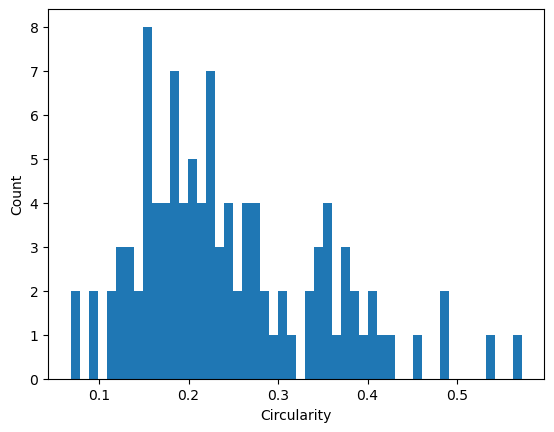

In [10]:
import matplotlib.pyplot as plt

plt.hist(gdf["circularity"], bins=50)
plt.xlabel("Circularity")
plt.ylabel("Count")
plt.show()

In [ ]:
circular_towns = gdf[gdf["circularity"] > 0.9]
print(circular_towns[["NAME", "circularity"]].sort_values("circularity", ascending=False))